This is analysis of Zakhary's Karate Club. There are 34 members in the group . The interaction between members is displayed using graph network.        
The group is split into two factions and its an attempt to predict to which faction each member would opt based on the member interactions.      
Besides that , networking info such as how many average connections per member , how many members well connected etc can be found out.    

In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import pandas as pd

In [59]:
from networkx.algorithms import clique

In [4]:
ZKC = nx.karate_club_graph()

In [6]:
ZKC.order() ## NO OF NODES

34

In [20]:
ZKC.size() ## NO OF EDGES

78

In [21]:
print("Avg degree :{}".format(ZKC.size()/ZKC.order())) ## Average connections for each member

Avg degree :2.2941176470588234


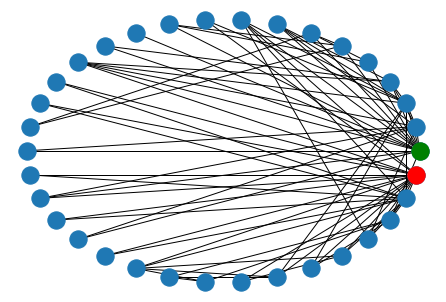

In [44]:
Mr_Hi = 0
John_A = 33

circ_pos = nx.circular_layout(ZKC) 

#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC,circ_pos)

#Highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [80]:
hi_list = []
officer_list = []
for k,v in club_labels.items():
    if v == 'Mr. Hi':
        hi_list.append(k)
    else:
        officer_list.append(k)

In [81]:
hi_list.remove(0)
officer_list.remove(33)

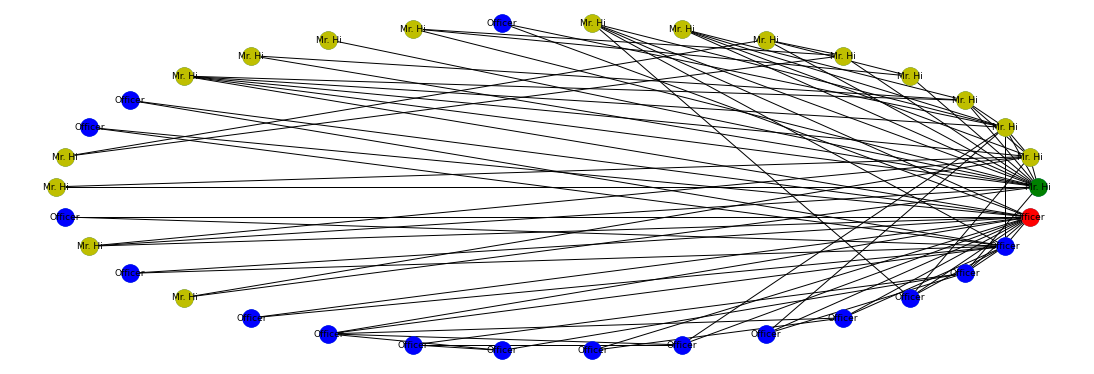

In [84]:
Mr_Hi = 0 ## Assign node 0  as Mr Hi.
John_A = 33 ## Assign node 33 as officer 

plt.figure(figsize = (15,5))
circ_pos = nx.circular_layout(ZKC) 

#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC,circ_pos)

#highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=[John_A], node_color='r', alpha=1)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=hi_list, node_color='y', alpha=1)
nx.draw_networkx_nodes(ZKC, circ_pos, nodelist=officer_list, node_color='b', alpha=1)

nx.draw_networkx_labels(ZKC,circ_pos,club_labels,font_size=9)
plt.show()

In [12]:
nx.center(ZKC) ##  players that are least connections  away from other players 

[0, 1, 2, 3, 8, 13, 19, 31]

In [13]:
nx.periphery(ZKC) ## players that are at maximum connections away  from other players 

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [14]:
nx.radius(ZKC) ## least connections between two players 

3

In [15]:
nx.diameter(ZKC) ## max connections  between two players 

5

In [53]:
degree_list = list(ZKC.degree())
degree_list 

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 5),
 (24, 3),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 3),
 (29, 4),
 (30, 4),
 (31, 6),
 (32, 12),
 (33, 17)]

In [54]:
only_degrees = [n[1] for n in degree_list]
only_degrees

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

In [55]:
av_degree = sum(only_degrees) / len(only_degrees)
print("Avg degree :{}".format(av_degree))

Avg degree :4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

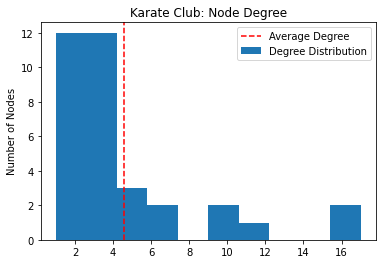

In [56]:
# Plot the degree distribution to get a better insight
plt.hist(only_degrees,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')


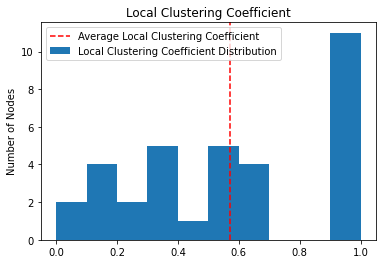

In [57]:
#Compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC)

#average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

In [23]:
## Player having the most connections 
sorted(degree_list , key = lambda x : x[1] , reverse = True)[0:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

In [24]:
## Player having the least connections 
sorted(degree_list , key = lambda x : x[1])[0:5]

[(11, 1), (9, 2), (12, 2), (14, 2), (15, 2)]

In [25]:
## for all nodes
all_coefs = nx.clustering(ZKC)

## avg clustering coeff
print(sum(all_coefs.values())/ len(all_coefs))

print("Avg clustering : {}".format(nx.average_clustering(ZKC) ))  ## MEANING ?

0.5706384782076823
Avg clustering : 0.5706384782076823


In [50]:
density = nx.density(ZKC)

print('The edge density is: ' + str(density)) ##how many edges are present in the network as compared to the total possible number of edges

The edge density is: 0.13903743315508021


In [58]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

# perform the community detection
c = list(greedy_modularity_communities(ZKC))

#Let's find out how many communities we detected
print(len(c))

3


In [64]:
# Look into the 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)


[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


In [66]:
#Display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC,'club')

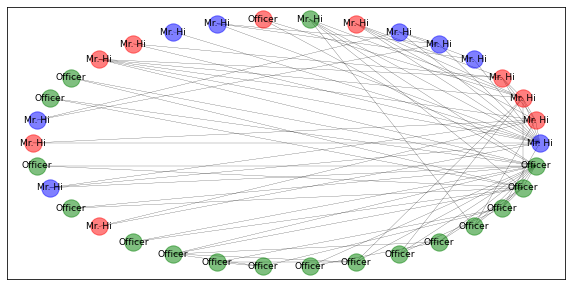

In [69]:
#draw each set of nodes in a seperate colour

plt.figure(figsize = (10,5))
nx.draw_networkx_nodes(ZKC,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

#now we add edges to the drawing 
nx.draw_networkx_edges(ZKC,circ_pos,stlye='dashed',width = 0.2)

#add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC,circ_pos,club_labels,font_size=9)

plt.show()

In [87]:
## Since group 3 is a small group of 8 and consisting of 'Mr. Hi' , combine it with group 1. 
combined_community = community_1 + community_2

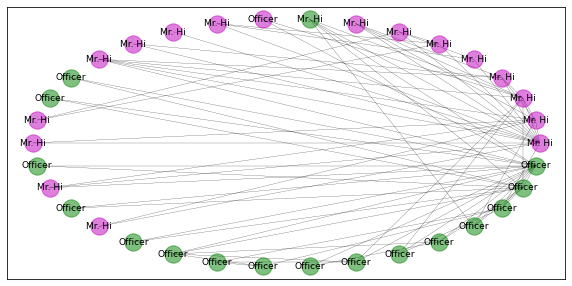

In [88]:
## replotting 
plt.figure(figsize = (10,5))
nx.draw_networkx_nodes(ZKC,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC,circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)


#now add edges to the drawing 
nx.draw_networkx_edges(ZKC,circ_pos,stlye='dashed',width = 0.2)

#finally add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC,circ_pos,club_labels,font_size=9)

plt.show()

The graph shows that only one member was wrongly predicted of the club - Predicted Officer while the original club is Mr Hi.  